# Problem Statement

In [678]:
# guide the education company named X on their online course over converwsion rate of leads

# the lead conversion rate should be 80 percent


# Education company case study

### Step 1: Importing and Merging Data

In [476]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [477]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [478]:
# Importing all datasets

# we have three different sheets
leads_data=pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [479]:
# dimensions of leads_data

leads_data.shape

(9240, 37)

In [480]:
# the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [481]:
# type of each column
leads_data.info()

# you have lot of columns with type objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [482]:
# List of variables to map

varlist =  [
    'Do Not Email',
'Do Not Call',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview'

]

# Defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [483]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [484]:
#### drop unnecessary columns

#columns like Last Activity and Tags have very diverse categorical values

# and these columns doesn't bring value for the business side

# Country column is mostly india and the whole column has diverse categorical values

leads_data.drop(['Tags','Last Activity','Country','Lead Source'],axis=1,inplace=True)

#### Checking for Missing Values and Inputing Them

In [485]:
# Adding up the missing values (column-wise)
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [486]:
# we also have values called 'select' which is as good as null

# List of variables to map

varlist =  [
    'Specialization',
'How did you hear about X Education',
'Lead Profile',
'City'
]

# Defining the map function
def select_map(x):
    if x=='Select':
        return None
    else:
        return x

# Applying the function to the leads_data list
leads_data['Specialization']=leads_data['Specialization'].apply(select_map)
leads_data['How did you hear about X Education']=leads_data['How did you hear about X Education'].apply(select_map)
leads_data['Lead Profile']=leads_data['Lead Profile'].apply(select_map)
leads_data['City']=leads_data['City'].apply(select_map)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,0,0,0,0.0,0,0.0,None,...,0,None,None,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,0,0,0,5.0,674,2.5,None,...,0,None,None,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,0,0,1,2.0,1532,2.0,Business Administration,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,0,0,0,1.0,305,1.0,Media and Advertising,...,0,None,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,0,0,1,2.0,1428,1.0,None,...,0,None,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [487]:
# Adding up the missing values (column-wise)
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [488]:
## calculate the perce3ntage of missing values column wise
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [489]:
# let's drop the columns which are having null values greater than 30 percent
threshold_drop=leads_data.columns[leads_data.isnull().sum()>30*9240/100] 

In [490]:
threshold_drop # these are the columns that should be dropped

Index(['Specialization', 'How did you hear about X Education', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [491]:
leads_data.drop(threshold_drop,axis=1,inplace=True)

In [492]:
leads_data.columns.shape # after dropping threshold violating columns we have a total of 27 columns

(24,)

### imputing the missing values

In [493]:
## calculate the perce3ntage of missing values column wise
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [494]:
# What is your current occupation, What matters most to you in choosing a course, Lead Source

# this are a categorical variables so impute with mode

print(leads_data['What is your current occupation'].mode())
print(leads_data['What matters most to you in choosing a course'].mode())



0    Unemployed
dtype: object
0    Better Career Prospects
dtype: object


In [495]:
# fill nulls for categorical variables


leads_data['What is your current occupation'].fillna(leads_data['What is your current occupation'].mode()[0],inplace=True)
leads_data['What matters most to you in choosing a course'].fillna(leads_data['What matters most to you in choosing a course'].mode()[0],inplace=True)


<AxesSubplot:xlabel='TotalVisits'>

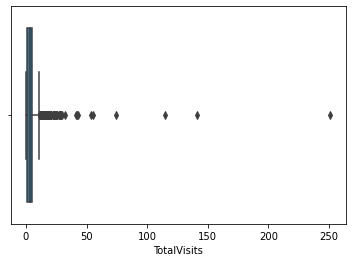

In [496]:
# below are continous variables fill it with median

# TotalVisits, Page Views Per Visit

# have a box plot, if outliers are present impute with  median

sns.boxplot(leads_data['TotalVisits'])
# the below boxplot has outliers hence impute with  median

<AxesSubplot:xlabel='Page Views Per Visit'>

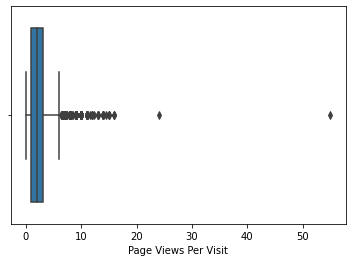

In [497]:
sns.boxplot(leads_data['Page Views Per Visit'])

In [498]:
# impute the above two columns with median

leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].median(),inplace=True)
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].median(),inplace=True)


In [499]:
# check null values again

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

# as you can see all values are imputed

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Receive More Updates About Our Courses        

#### categorical variables with multiple levels, 
#### create dummy features (one-hot encoded)

In [500]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1=pd.get_dummies(leads_data[['Lead Origin',
                                 'What is your current occupation',
                                 'What matters most to you in choosing a course',
                                    'Last Notable Activity']],drop_first=True)

dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [501]:
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,dummy1],1)

In [502]:
# take a look
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,0,0,0,0.0,0,0.0,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,0,0,0,5.0,674,2.5,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,0,0,1,2.0,1532,2.0,Student,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,0,0,0,1.0,305,1.0,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,0,0,1,2.0,1428,1.0,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [503]:
# drop the ccolumns which are not used anymore

leads_data = leads_data.drop(['Lead Origin',
                                 'What is your current occupation',
                                 'What matters most to you in choosing a course',
                                    'Last Notable Activity'], 1)

#### Checking for Outliers

In [504]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [505]:
num_leads.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


<AxesSubplot:xlabel='TotalVisits'>

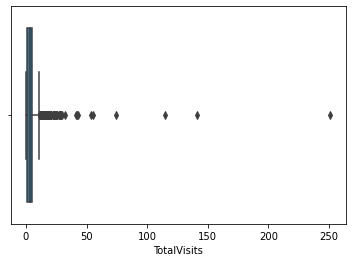

In [506]:
# looks like there are outliers in total visits and page views per visit
# let's boxplot them

sns.boxplot(leads_data['TotalVisits'])

In [507]:
# so handle the outliers
#num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])
leads_data[leads_data['TotalVisits']>leads_data['TotalVisits'].quantile(0.95)]=leads_data['TotalVisits'].quantile(0.95)

<AxesSubplot:xlabel='TotalVisits'>

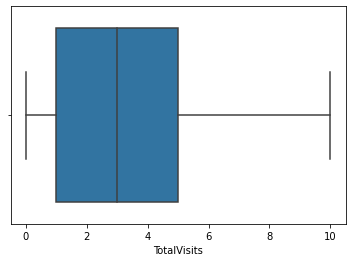

In [508]:
sns.boxplot(leads_data['TotalVisits']) # handled now

<AxesSubplot:xlabel='Page Views Per Visit'>

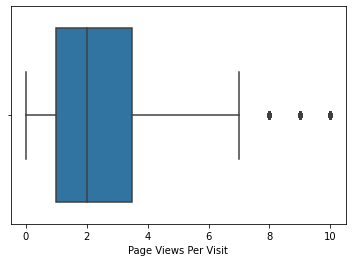

In [509]:
# Page Views Per Visit
sns.boxplot(leads_data['Page Views Per Visit']) # this doesn't look very much distorted


In [510]:
leads_data[leads_data['Page Views Per Visit']>leads_data['Page Views Per Visit'].quantile(0.97)]=leads_data['Page Views Per Visit'].quantile(0.97)

<AxesSubplot:xlabel='Total Time Spent on Website'>

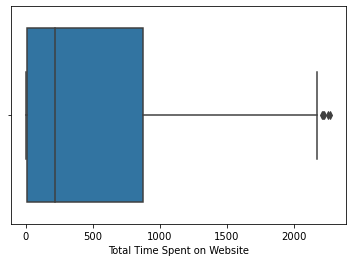

In [511]:
#Total Time Spent on Website
sns.boxplot(leads_data['Total Time Spent on Website']) # this might need some handling

In [512]:
#Total Time Spent on Website
leads_data[leads_data['Total Time Spent on Website']>leads_data['Total Time Spent on Website'].quantile(0.97)]=leads_data['Total Time Spent on Website'].quantile(0.97)

In [513]:
# all imputations and outliers are handled

### handling target variable

In [514]:
### Checking the values in converted column # ideally this should be 0 or 1
leads_data['Converted'].value_counts()

# drop the rows where 10 and 1646

0       5407
1       3203
10       353
1646     277
Name: Converted, dtype: int64

In [515]:
print(leads_data.shape)
leads_data=leads_data[(leads_data['Converted']!=10) & (leads_data['Converted']!=1646)]

(9240, 46)


In [516]:
print(leads_data.shape)

(8610, 46)


### drop montonic columns

In [517]:


# these are all having single values, so drop them

print(leads_data['Magazine'].value_counts())
print(leads_data['Newspaper'].value_counts())
print(leads_data['X Education Forums'].value_counts())
print(leads_data['Receive More Updates About Our Courses'].value_counts())
print(leads_data['Update me on Supply Chain Content'].value_counts())
print(leads_data['Get updates on DM Content'].value_counts())

0    8610
Name: Magazine, dtype: int64
0    8610
Name: Newspaper, dtype: int64
0    8610
Name: X Education Forums, dtype: int64
0    8610
Name: Receive More Updates About Our Courses, dtype: int64
0    8610
Name: Update me on Supply Chain Content, dtype: int64
0    8610
Name: Get updates on DM Content, dtype: int64


In [518]:
print(leads_data.shape)
leads_data.drop(['Magazine','Newspaper','X Education Forums','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content'],inplace=True,axis=1)

(8610, 46)


In [519]:
print(leads_data.shape)

(8610, 40)


### Step 4: Test-Train Split

In [610]:
from sklearn.model_selection import train_test_split

In [611]:
# Putting feature variable to X
X = leads_data.drop(['Prospect ID','Lead Number','Converted'], axis=1) # as prospect Id and lead number are not attributes but ID's

X.head()
# converted column is target variable

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [612]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [613]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [614]:
from sklearn.preprocessing import StandardScaler # we took standardscaler instead of minmaxscaler

In [615]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4673,0,0,-1.177197,-0.876285,-1.169277,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
526,0,0,0.044528,1.399653,0.407018,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7283,0,0,-1.177197,-0.876285,-1.169277,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5002,0,0,0.451770,-0.126351,-0.118414,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6665,0,0,0.451770,1.811815,0.932450,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [616]:
### Checking the conversion Rate
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

# a good percentage of 37 percent conversion is present

# This is not a class imbalance case

37.20092915214867

### Step 6: Looking at Correlations

In [617]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

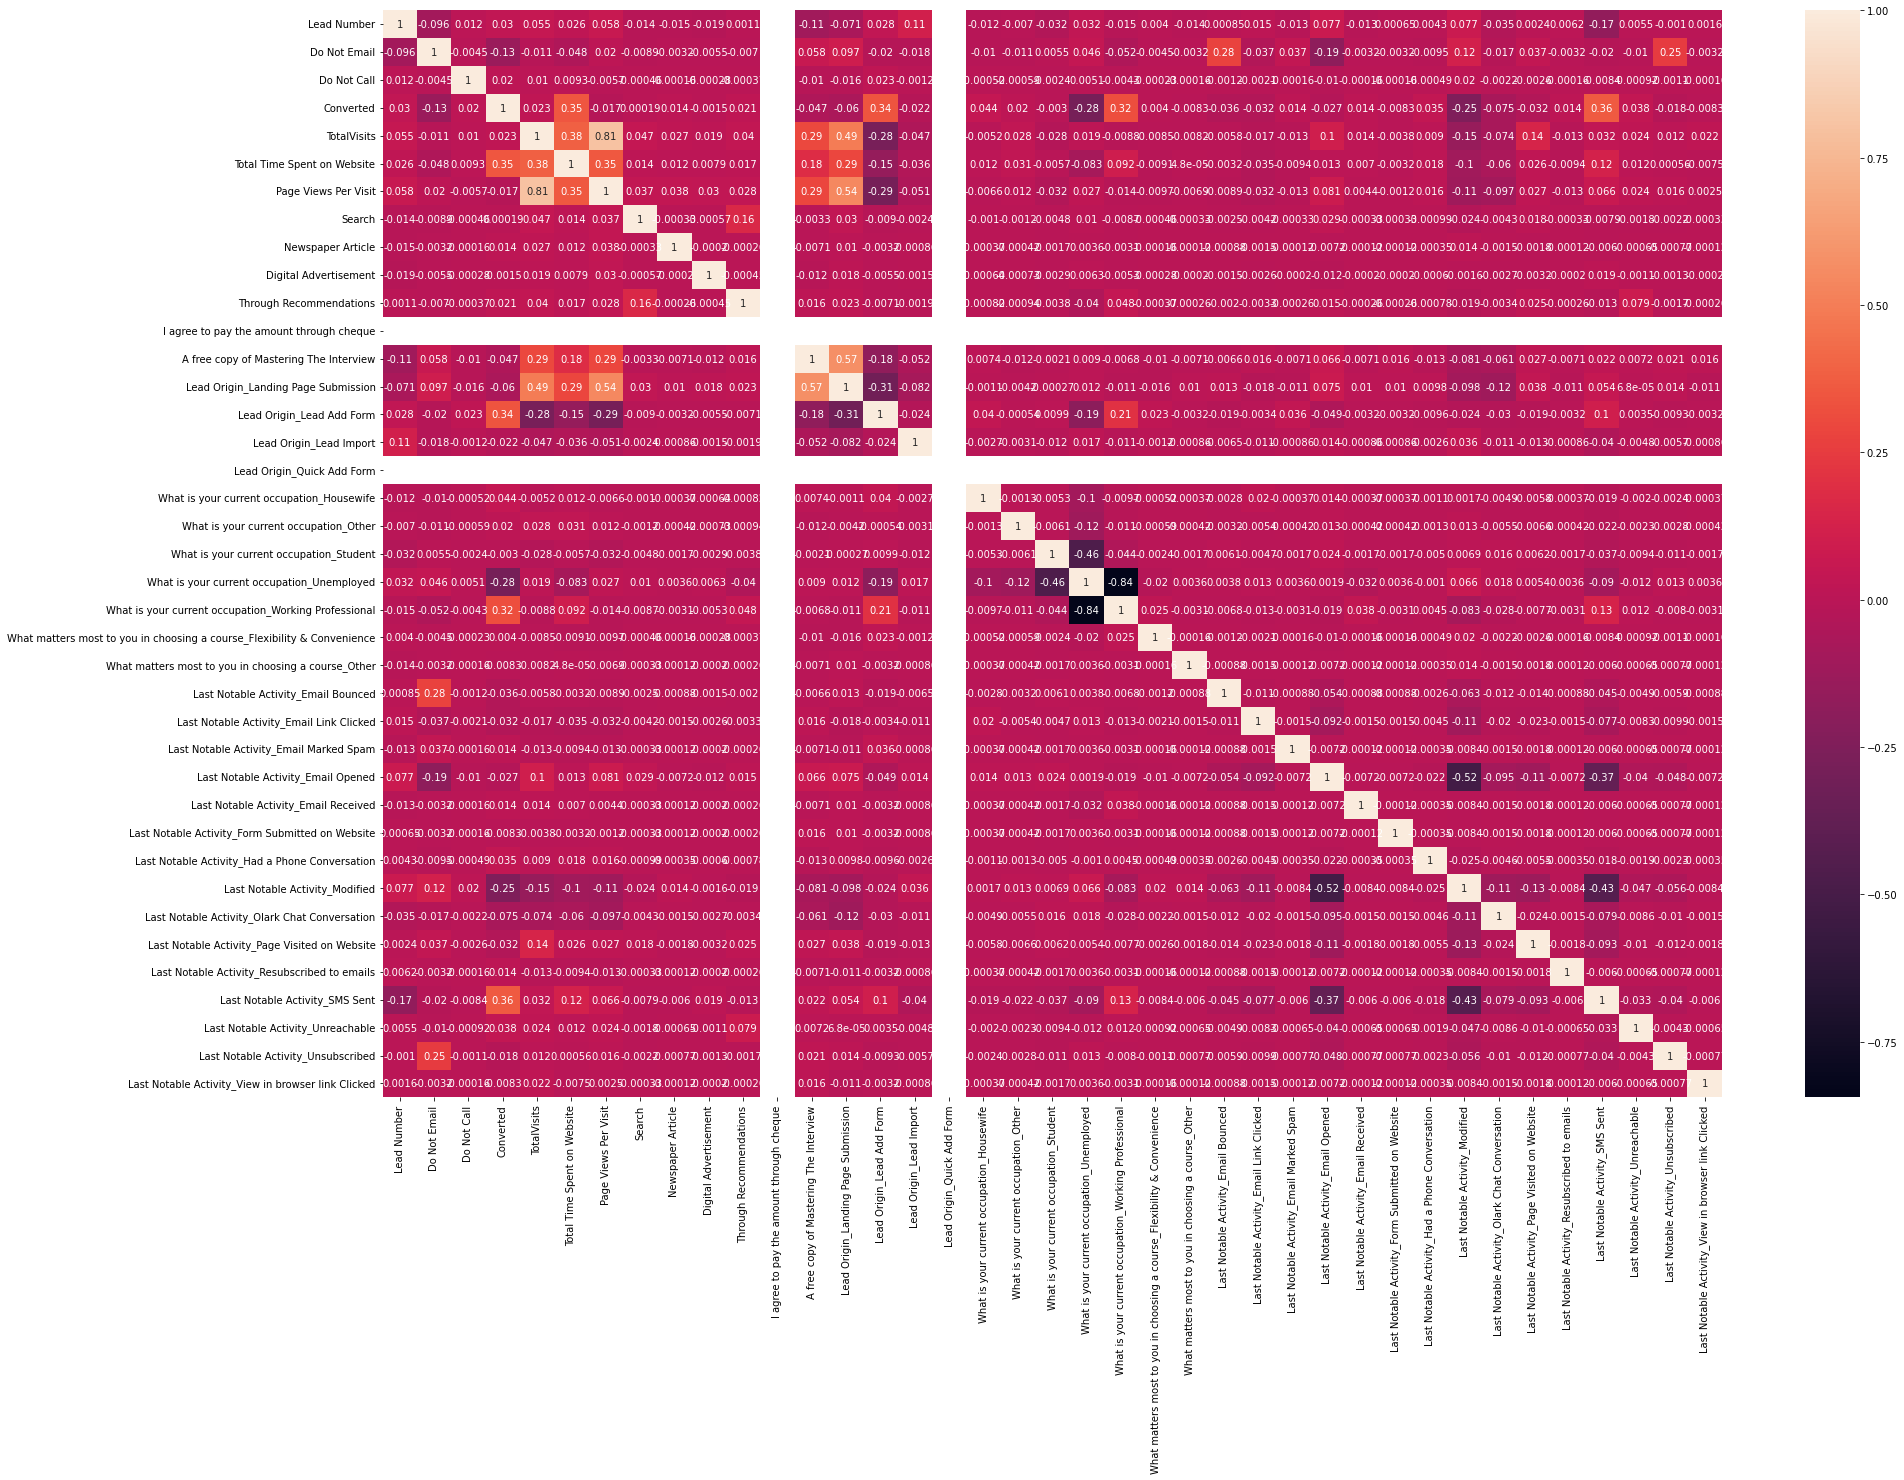

In [618]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

In [619]:
# looks like there is room to drop more columns
X_test.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'Digital Advertisement', 'Through Recommendations',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',

#### Dropping highly correlated dummy variables

In [620]:
X_test = X_test.drop(['What is your current occupation_Unemployed','Last Notable Activity_Modified','Last Notable Activity_SMS Sent','Last Notable Activity_Email Bounced',
                       'Last Notable Activity_Unsubscribed','Lead Origin_Landing Page Submission',
                     'Page Views Per Visit','A free copy of Mastering The Interview'], 1)
X_train = X_train.drop(['What is your current occupation_Unemployed','Last Notable Activity_Modified','Last Notable Activity_SMS Sent','Last Notable Activity_Email Bounced',
                         'Last Notable Activity_Unsubscribed','Lead Origin_Landing Page Submission',
                       'Page Views Per Visit','A free copy of Mastering The Interview'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

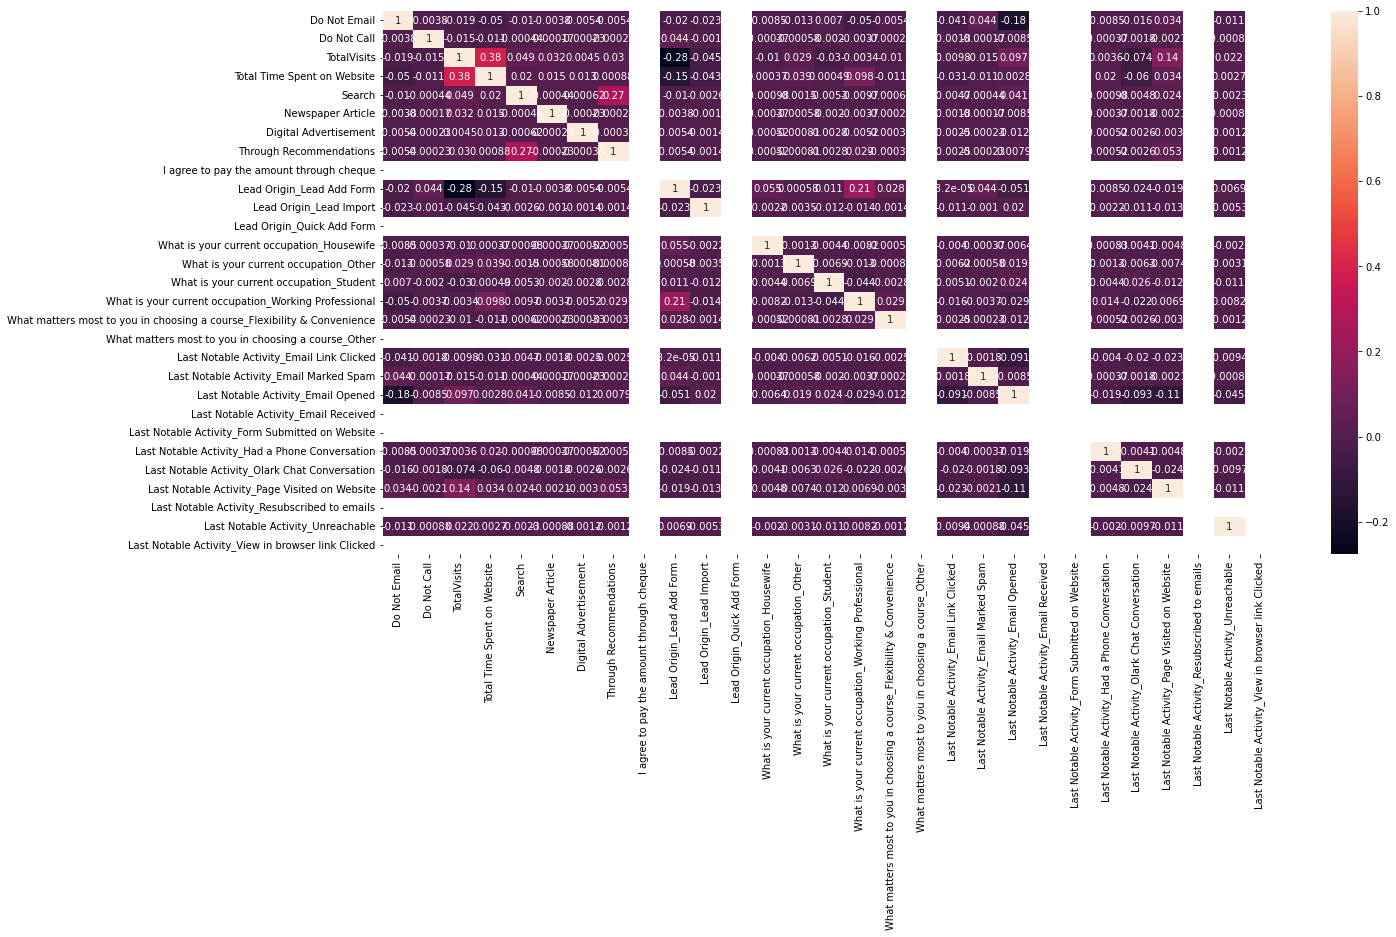

In [621]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building

In [622]:
#### Running Your First Training Model

In [623]:
import statsmodels.api as sm

In [624]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()  ### you can see there is lot of scope to drop columns as p value is too high

# so let's do rfe

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6004
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2828.1
Date:                Tue, 24 Jan 2023   Deviance:                       5656.2
Time:                        22:29:39   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.8279      0.044    -18.605      0.000      -0.915      -0.741
Do Not Email                                                               -1.4851      0.160     -9.282      0.000      -1.799      -1.172
Do Not Call                                                                20.2388   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                                                -0.0193      0.037     -0.518      0.604      -0.092       0.054
Total Time Spent on Website                                                 0.9212      0.035     26.286      0.000       0.853       0.990
Search                                                                      0.2994      0.878      0.341      0.733      -1.421       2.019
Newspaper Article                                                          22.3879   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Digital Advertisement                                                       0.1712      1.743      0.098      0.922      -3.245       3.587
Through Recommendations                                                    -0.3431      2.075     -0.165      0.869      -4.411       3.725
I agree to pay the amount through cheque                                 1.532e-11   8.72e-08      0.000      1.000   -1.71e-07    1.71e-07
Lead Origin_Lead Add Form                                                   3.9397      0.195     20.226      0.000       3.558       4.321
Lead Origin_Lead Import                                                    -0.4450      0.492     -0.904      0.366      -1.410       0.520
Lead Origin_Quick Add Form                                               5.434e-11   9.06e-08      0.001      1.000   -1.78e-07    1.78e-07
What is your current occupation_Housewife                                  21.6567   1.82e+04      0.001      0.999   -3.57e+04    3.58e+04
What is your current occupation_Other                                       0.2586      0.655      0.395      0.693      -1.026       1.543
What is your current occupation_Student                                     0.2341      0.214      1.096      0.273      -0.184       0.653
What is your current occupation_Working Professional                        2.7556      0.185     14.889      0.000       2.393       3.118
What matters most to you in choosing a course_Flexibility & Convenience    -1.9809      4.383     -0.452      0.651     -10.571       6.609
What matters most to you in choosing a course_Other                      2.248e-15   7.47e-12      0.000      1.000   -1.46e-11    1.46e-11
Las

### Step 8: Feature Selection Using RFE

In [625]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [626]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [627]:
rfe.support_ # this gives you the columns that are top 12

array([ True, False, False,  True, False,  True, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True, False])

In [628]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 7),
 ('Newspaper Article', True, 1),
 ('Digital Advertisement', False, 10),
 ('Through Recommendations', False, 9),
 ('I agree to pay the amount through cheque', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 13),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 5),
 ('What is your current occupation_Student', False, 4),
 ('What is your current occupation_Working Professional', True, 1),
 ('What matters most to you in choosing a course_Flexibility & Convenience',
  False,
  6),
 ('What matters most to you in choosing a course_Other', False, 16),
 ('Last Notable Activity_Email Link Clicked', True, 1),
 ('Last Notable Activity_Email Marked Spam', False, 3),
 ('Last Notable Activity_Email Opened', False, 

In [629]:
col = X_train.columns[rfe.support_]

In [630]:
X_train.columns[~rfe.support_] # drop the columns which are not top 12

Index(['Do Not Call', 'TotalVisits', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'I agree to pay the amount through cheque',
       'Lead Origin_Quick Add Form', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

##### Assessing the model with StatsModels

In [631]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary() ##3 now you can see p values are all good

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6014
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2836.4
Date:                Tue, 24 Jan 2023   Deviance:                       5672.7
Time:                        22:29:48   Pearson chi2:                 6.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9176      0.036    -25.190      0.000      -0.989      -0.846
Do Not Email                                            -1.3875      0.158     -8.806      0.000      -1.696      -1.079
Total Time Spent on Website                              0.9153      0.033     27.722      0.000       0.851       0.980
Newspaper Article                                       22.4363   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Origin_Lead Add Form                                3.9732      0.192     20.745      0.000       3.598       4.349
Lead Origin_Lead Import                                 -0.4410      0.490     -0.900      0.368      -1.401       0.519
What is your current occupation_Housewife               21.7186   1.81e+04      0.001      0.999   -3.54e+04    3.55e+04
What is your current occupation_Working Professional     2.7483      0.185     14.879      0.000       2.386       3.110
Last Notable Activity_Email Link Clicked                -0.5929      0.267     -2.220      0.026      -1.116      -0.069
Last Notable Activity_Had a Phone Conversation          22.7435   1.85e+04      0.001      0.999   -3.62e+04    3.63e+04
Last Notable Activity_Olark Chat Conversation           -1.3789      0.365     -3.777      0.000      -2.095      -0.663
Last Notable Activity_Page Visited on Website           -0.3998      0.217     -1.842      0.066      -0.825       0.026
Last Notable Activity_Unreachable                        1.4311      0.464      3.082      0.002       0.521       2.341
========================================================================================================================
"""

In [632]:
# let's also check vif score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [633]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,1.12
6,What is your current occupation_Working Profes...,1.11
1,Total Time Spent on Website,1.05
0,Do Not Email,1.01
10,Last Notable Activity_Page Visited on Website,1.01
2,Newspaper Article,1.00
4,Lead Origin_Lead Import,1.00
5,What is your current occupation_Housewife,1.00
7,Last Notable Activity_Email Link Clicked,1.00
8,Last Notable Activity_Had a Phone Conversation,1.00


In [634]:
# all vif's are fine 
# let's drop columns which are having p>0.05

# drop Newspaper Article, Lead Origin_Lead Import,What is your current occupation_Housewife,Last Notable Activity_Had a Phone Conversation
#, Last Notable Activity_Page Visited on Website

col = col.drop(['Newspaper Article','Lead Origin_Lead Import','What is your current occupation_Housewife',
                        'Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Page Visited on Website'], 1)

In [635]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6027
Model:                            GLM   Df Residuals:                     6019
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.1
Date:                Tue, 24 Jan 2023   Deviance:                       5690.1
Time:                        22:29:54   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9260      0.036    -25.800      0.000      -0.996      -0.856
Do Not Email                                            -1.3940      0.157     -8.855      0.000      -1.703      -1.085
Total Time Spent on Website                              0.9165      0.033     27.809      0.000       0.852       0.981
Lead Origin_Lead Add Form                                3.9894      0.191     20.843      0.000       3.614       4.365
What is your current occupation_Working Professional     2.7464      0.185     14.871      0.000       2.384       3.108
Last Notable Activity_Email Link Clicked                -0.5857      0.267     -2.192      0.028      -1.109      -0.062
Last Notable Activity_Olark Chat Conversation           -1.3711      0.365     -3.754      0.000      -2.087      -0.655
Last Notable Activity_Unreachable                        1.4398      0.464      3.101      0.002       0.530       2.350
========================================================================================================================
"""

In [636]:
# let's also checkk vif scores

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.12
3,What is your current occupation_Working Profes...,1.10
1,Total Time Spent on Website,1.05
0,Do Not Email,1.01
4,Last Notable Activity_Email Link Clicked,1.00
5,Last Notable Activity_Olark Chat Conversation,1.00
6,Last Notable Activity_Unreachable,1.00


In [637]:
# therfore p values and vif values are according to standards so our model is a hit

In [638]:
# let;s claculate y_pred for train
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [639]:
y_train_pred[:10]

array([0.15069977, 0.5882424 , 0.15069977, 0.26079667, 0.97013633,
       0.16337773, 0.90553305, 0.23704092, 0.50119174, 0.15069977])

In [640]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.150700,4673
1,0,0.588242,526
2,0,0.150700,7283
3,0,0.260797,5002
4,1,0.970136,6665


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [641]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.150700,4673,0
1,0,0.588242,526,1
2,0,0.150700,7283,0
3,0,0.260797,5002,0
4,1,0.970136,6665,1


In [642]:
from sklearn import metrics

In [643]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3353  431]
 [ 831 1412]]


In [644]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7906089264974282


In [645]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [646]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# even though you had high accuracy, your sensitivity is very less

# so you are able to find only 60 percent of people who will be converting
# will your company be ok with that as it is looking to reduce churn

# no so increase the  metric till 70 percent

0.6295140436914847

### redoing  'predicted' with 1 if Churn_Prob > 0.4 else 0

In [647]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.150700,4673,0
1,0,0.588242,526,1
2,0,0.150700,7283,0
3,0,0.260797,5002,0
4,1,0.970136,6665,1


In [648]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3269  515]
 [ 670 1573]]


In [649]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

# so our model is very much accurate and meets our standard

0.8033847685415629


In [650]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [651]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# so you are able to find only 60 percent of people who will be converting
# company will be very ok with this approach

0.7012929112795363

### Step 11: Making predictions on the test set

In [652]:
scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(
    X_test[['TotalVisits','Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Newspaper Article,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,Lead Origin_Lead Add Form,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
4673,0,0,-1.177197,-0.876285,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
526,0,0,0.044528,1.399653,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7283,0,0,-1.177197,-0.876285,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5002,0,0,0.451770,-0.126351,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6665,0,0,0.451770,1.811815,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [653]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
377,0,2.399650,0,0,0,0,0
8914,0,-0.866864,0,0,0,0,0
7340,0,-0.870862,1,0,0,0,0
6340,0,-0.870862,0,0,0,0,0
3792,0,-0.303120,0,0,0,0,0


In [654]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [655]:
y_test_pred = res.predict(X_test_sm)

In [656]:
y_test_pred[:10]

377     0.781285
8914    0.151808
7340    0.905957
6340    0.151337
3792    0.230794
4781    0.993384
3798    0.631889
189     0.265263
4124    0.252954
8626    0.182331
dtype: float64

In [657]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [658]:
# Let's see the head
y_pred_1.head()

,0
377,0.781285
8914,0.151808
7340,0.905957
6340,0.151337
3792,0.230794


In [659]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [660]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [661]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [662]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [663]:
y_pred_final.head()

,Converted,LeadID,0
0,1,377,0.781285
1,0,8914,0.151808
2,1,7340,0.905957
3,0,6340,0.151337
4,0,3792,0.230794


In [665]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [669]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [670]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,final_predicted
0,1,377,0.781285,1
1,0,8914,0.151808,0
2,1,7340,0.905957,1
3,0,6340,0.151337,0
4,0,3792,0.230794,0


In [672]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8118466898954704

In [674]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1401,  222],
       [ 264,  696]], dtype=int64)

In [675]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [676]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.725

In [677]:
# Let us calculate specificity
TN / float(TN+FP)

0.8632162661737524

# Therfore accuracy for both test and train is over 80